In [2]:
import sys
!{sys.executable} -m pip install numpy pandas matplotlib scikit-learn opencv-python tqdm pillow

  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
    --------------------------------------- 0.3/12.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.3 MB 2.0 MB/s eta 0:00:06
   --- ------------------------------------ 1.0/12.3 MB 1.7 MB/s eta 0:00:07
   ---- ----------------------------------- 1.3/12.3 MB 1.8 MB/s eta 0:00:07
   ----- ---------------------------------- 1.8/12.3 MB 1.8 MB/s eta 0:00:06
   ------ --------------------------------- 2.1/12.3 MB 1.8 MB/s eta 0:00:06
   -------- ------------------------------- 2.6/12.3 MB 1.8 MB/s eta 0:00:06
   --------- ------------------------------ 2.9/12.3 MB 1.8 MB/s eta 0:00:06
   ---------- -----------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import os
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt

In [4]:
DATA_DIR = "vesuvius_data"  # we will unzip here later
TRAIN_DIR = os.path.join(DATA_DIR, "train_images")
TEST_DIR = os.path.join(DATA_DIR, "test_images")

print("Paths ready")

Paths ready


In [5]:
import os

os.listdir("vesuvius_data")

['deprecated_train_images',
 'deprecated_train_labels',
 'test.csv',
 'test_images',
 'train.csv',
 'train_images',
 'train_labels']

In [6]:
train_df = pd.read_csv("vesuvius_data/train.csv")
train_df.head()

,id,scroll_id
0,1407735,26002
1,2290837,34117
2,3320274,35360
3,8862040,34117
4,11460685,34117


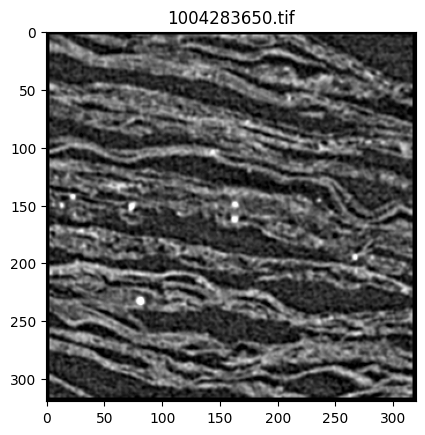

In [9]:
sample_file = os.listdir("vesuvius_data/train_images")[0]
img_path = os.path.join("vesuvius_data/train_images", sample_file)

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap="gray")
plt.title(sample_file)
plt.show()

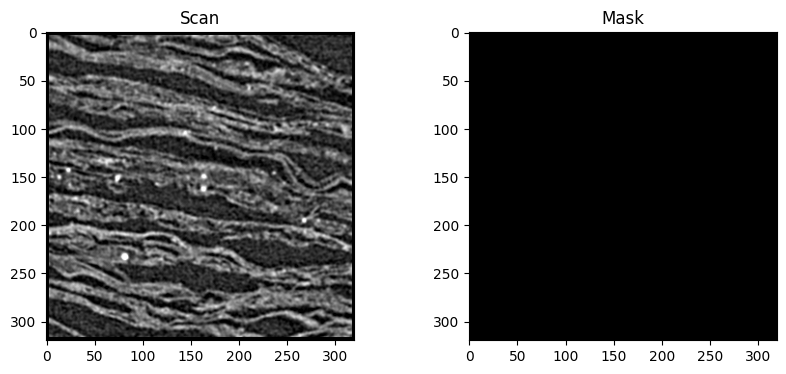

In [12]:
sample_file = label_files[0]

img_path = os.path.join("vesuvius_data/train_images", sample_file)
mask_path = os.path.join("vesuvius_data/train_labels", sample_file)

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Scan")
plt.imshow(img, cmap="gray")

plt.subplot(1,2,2)
plt.title("Mask")
plt.imshow(mask, cmap="gray")
plt.show()

In [18]:
def load_data(n_samples=300):
    files = os.listdir("vesuvius_data/train_labels")[:n_samples]
    
    X, y = [], []
    
    for f in tqdm(files):
        img = cv2.imread(os.path.join("vesuvius_data/train_images", f), 0)
        mask = cv2.imread(os.path.join("vesuvius_data/train_labels", f), 0)
        
        if img is None or mask is None:
            continue
            
        img = cv2.resize(img, (128,128))
        mask = cv2.resize(mask, (128,128))
        
        X.append(img)
        y.append(mask)
        
    return np.array(X), np.array(y)

X, y = load_data(300)
print(X.shape, y.shape)

100%|██████████| 300/300 [00:00<00:00, 431.80it/s]

(300, 128, 128) (300, 128, 128)


In [19]:
X = X / 255.0
y = y / 255.0

X_pixels = X.flatten().reshape(-1, 1)
y_pixels = (y.flatten() > 0.5).astype(int)

print(np.unique(y_pixels))
print(X_pixels.shape)

[0]
(4915200, 1)


In [17]:
X_pixels = X.flatten().reshape(-1, 1)
y_pixels = (y.flatten() > 0.5).astype(int)

print(np.unique(y_pixels))
print(X_pixels.shape, y_pixels.shape)

[0]
(4915200, 1) (4915200,)


In [20]:
features = []
labels = []

files = os.listdir("vesuvius_data/train_labels")[:500]

for f in tqdm(files):
    img = cv2.imread(os.path.join("vesuvius_data/train_images", f), 0)
    mask = cv2.imread(os.path.join("vesuvius_data/train_labels", f), 0)
    
    if img is None or mask is None:
        continue
    
    img = cv2.resize(img, (128,128))
    mask = cv2.resize(mask, (128,128))
    
    features.append([img.mean(), img.std()])
    labels.append(1 if mask.mean() > 1 else 0)

features = np.array(features)
labels = np.array(labels)

print(features.shape)
print(np.unique(labels))

100%|██████████| 500/500 [00:17<00:00, 29.28it/s] 

(500, 2)
[1]


In [21]:
test_files = os.listdir("vesuvius_data/test_images")

predictions = []

for f in tqdm(test_files):
    img = cv2.imread(os.path.join("vesuvius_data/test_images", f), 0)
    img = cv2.resize(img, (128,128))
    
    prob = img.mean() / 255.0
    predictions.append(prob)

predictions = np.array(predictions)
print(predictions.shape)

100%|██████████| 1/1 [00:00<00:00, 13.75it/s]

(1,)


In [22]:
sample_sub = pd.read_csv("vesuvius_data/test.csv")

sample_sub["ink"] = predictions[0]

sample_sub.to_csv("submission.csv", index=False)

sample_sub.head()

,id,scroll_id,ink
0,1407735,26002,0.327659
